**# Username: suneelraju160**

### **Name: Kucharlapati Venkata Suneel Raju**

Data Science latest assignments - 16 Aug 2025

Assignment 2: Basic Statics 1

Date: 28 Nov 2025

BASIC STATISTICS

Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

Introduction

●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

Descriptive Analytics for Numerical Columns
●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

●	Steps:

	Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).

	Identify numerical columns in the dataset.
	Calculate the mean, median, mode, and standard deviation for these columns.

	Provide a brief interpretation of these statistics.

Data Visualization

●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

●	Histograms:

	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

●	Box Plots:

	Create boxplots for numerical variables to identify outliers and the interquartile range.
	Discuss any findings, such as extreme values or unusual distributions.

●	Bar Chart Analysis for Categorical Column:

	Identify categorical columns in the dataset.
	Create bar charts to visualize the frequency or count of each category.

	Analyze the distribution of categories and provide insights.
  
Conclusion
●	Summarize the key findings from the descriptive analytics and data visualizations.


In [12]:
!pip install pandas numpy matplotlib


In [13]:
import pandas as pd

csv_path = '/content/sales_data_with_discounts.csv'
df = pd.read_csv(csv_path)

print(df.shape)
display(df.head())
print(df.info())

(450, 13)


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None


In [14]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [15]:
print("Descriptive Statistics for Numeric Columns:")
display(df[numeric_cols].describe())

Descriptive Statistics for Numeric Columns:


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


describe() is used for this dataframe to display the descriptive statistical values of numerical columns present in the csv file.
It shows count, mean, min, max, standard deviation and the quartiles.


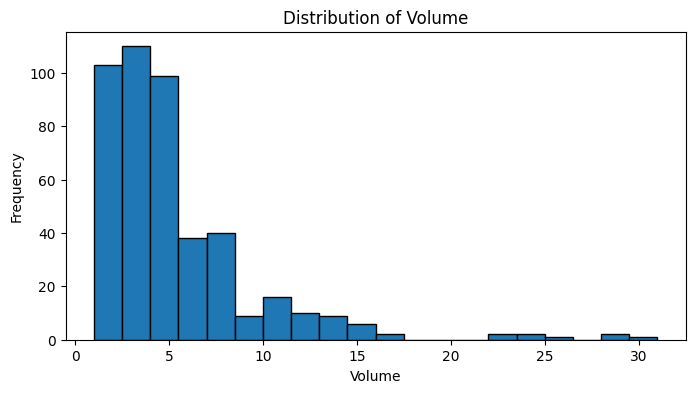

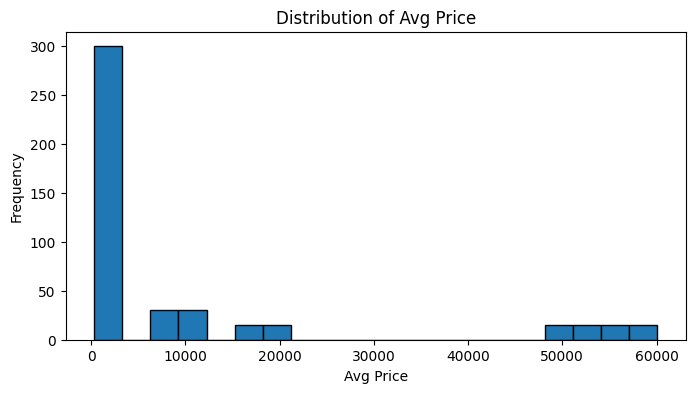

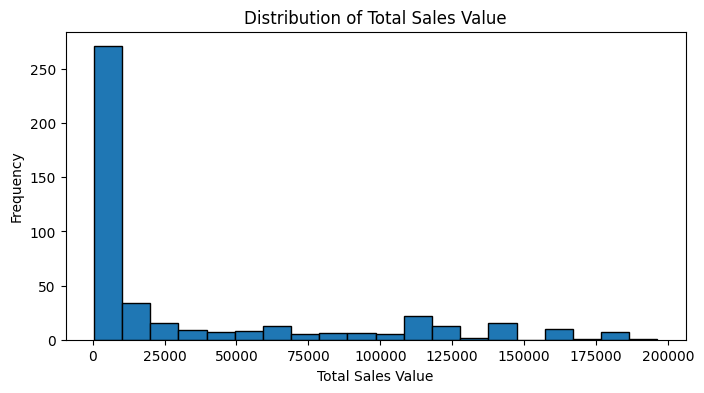

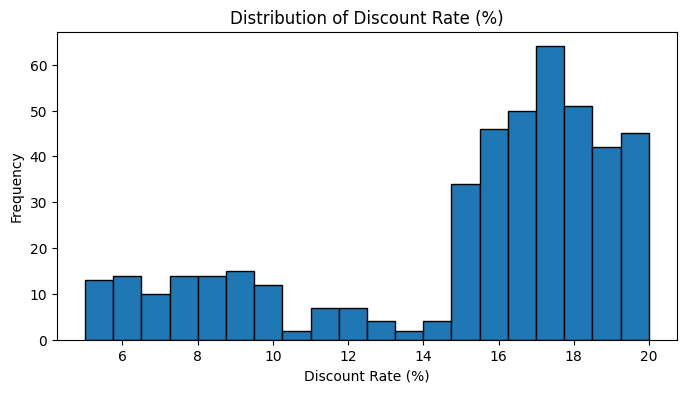

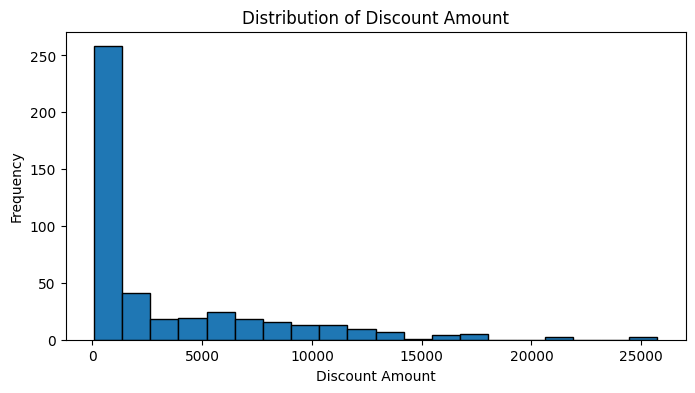

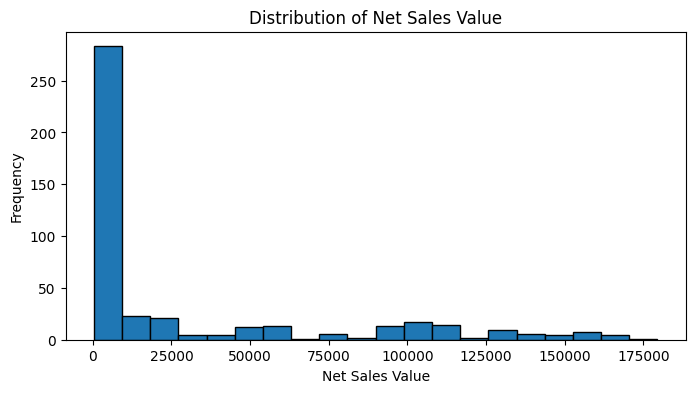

In [16]:
import matplotlib.pyplot as plt
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.hist(df[col], bins=20, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The skewness in the histogram representing discount rate and frequency is negatively skewed whereas remaining all plots are posetively skewed with respect to their frequencies.

Outliers are present at lower values in each plot except for discounts.

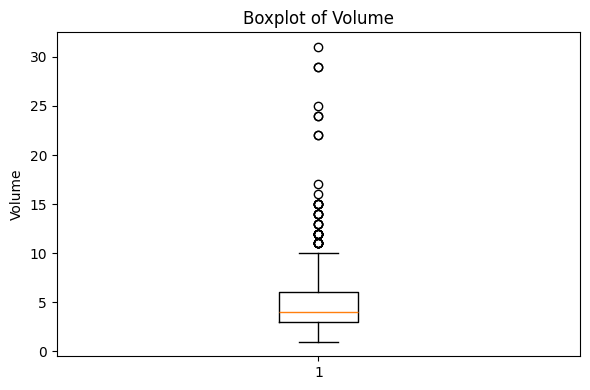

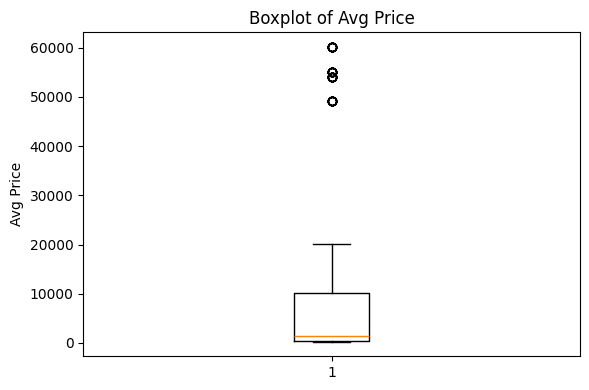

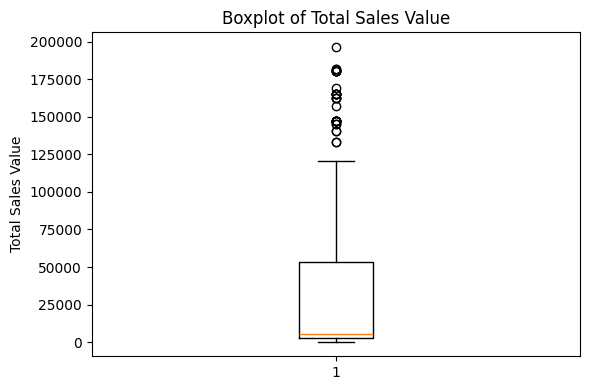

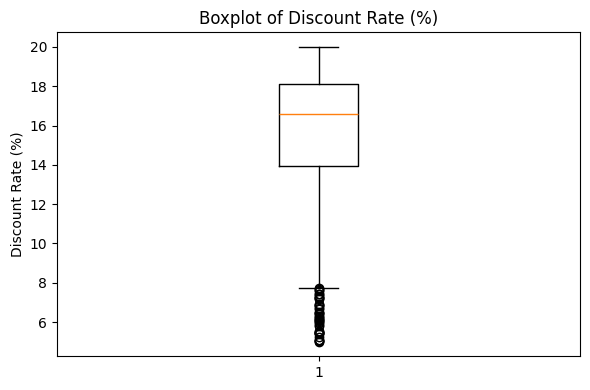

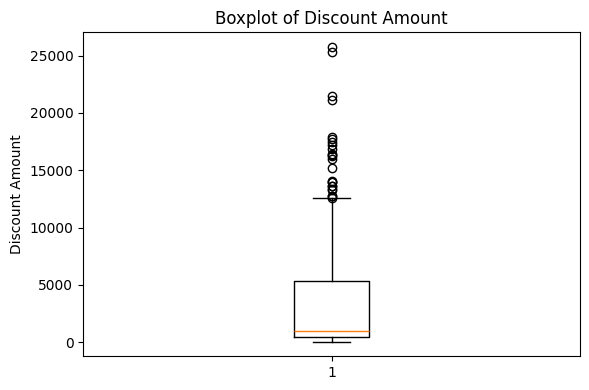

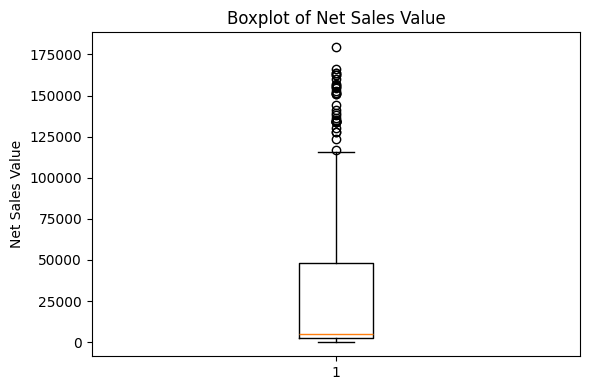

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"box_{col.replace(' ','_')}.png", dpi=150)
    plt.show()


In [20]:
def get_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]

    return {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Number of Outliers": len(outliers),
    }
outlier_summary = {}

for col in numeric_cols:
    result = get_iqr_outliers(df[col].dropna())
    outlier_summary[col] = result

outlier_summary


{'Volume': {'Q1': np.float64(3.0),
  'Q3': np.float64(6.0),
  'IQR': np.float64(3.0),
  'Lower Bound': np.float64(-1.5),
  'Upper Bound': np.float64(10.5),
  'Number of Outliers': 44},
 'Avg Price': {'Q1': np.float64(465.0),
  'Q3': np.float64(10100.0),
  'IQR': np.float64(9635.0),
  'Lower Bound': np.float64(-13987.5),
  'Upper Bound': np.float64(24552.5),
  'Number of Outliers': 60},
 'Total Sales Value': {'Q1': np.float64(2700.0),
  'Q3': np.float64(53200.0),
  'IQR': np.float64(50500.0),
  'Lower Bound': np.float64(-73050.0),
  'Upper Bound': np.float64(128950.0),
  'Number of Outliers': 36},
 'Discount Rate (%)': {'Q1': np.float64(13.965062543701741),
  'Q3': np.float64(18.114718477752703),
  'IQR': np.float64(4.149655934050962),
  'Lower Bound': np.float64(7.740578642625298),
  'Upper Bound': np.float64(24.339202378829146),
  'Number of Outliers': 45},
 'Discount Amount': {'Q1': np.float64(460.4593038855329),
  'Q3': np.float64(5316.4954266866525),
  'IQR': np.float64(4856.036122

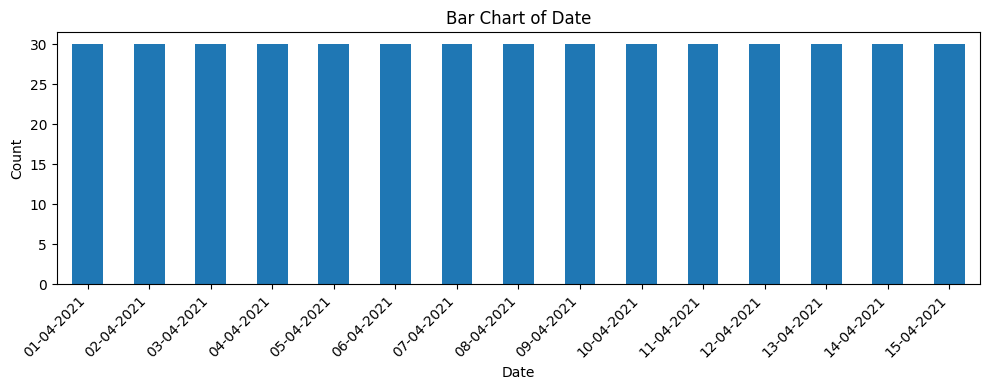

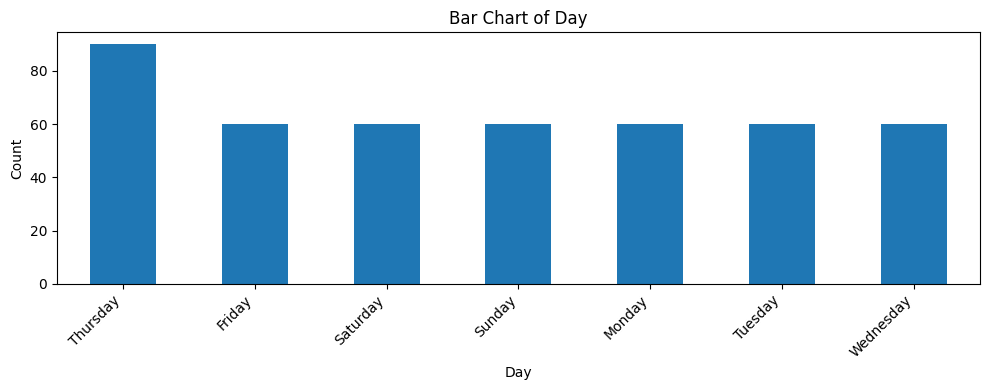

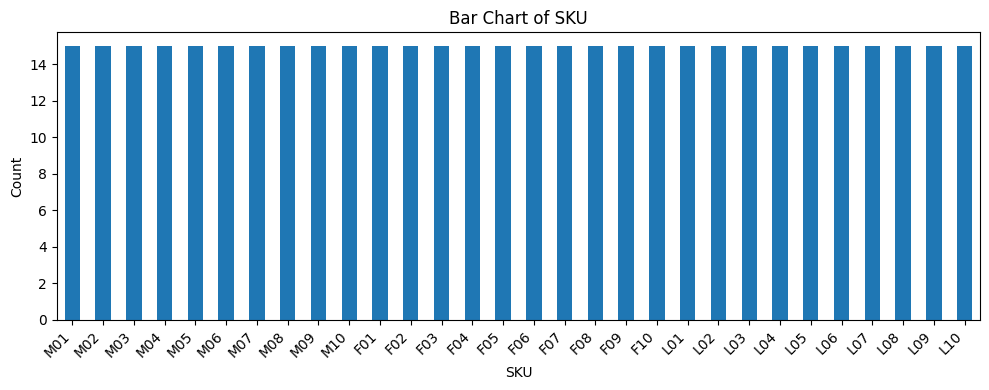

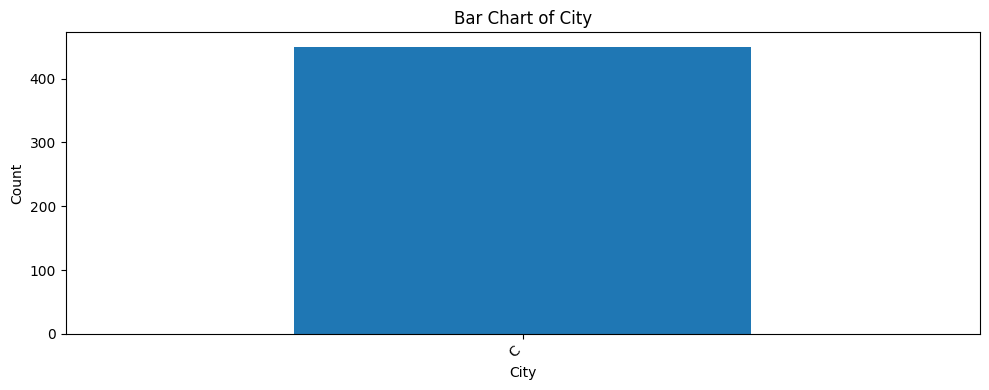

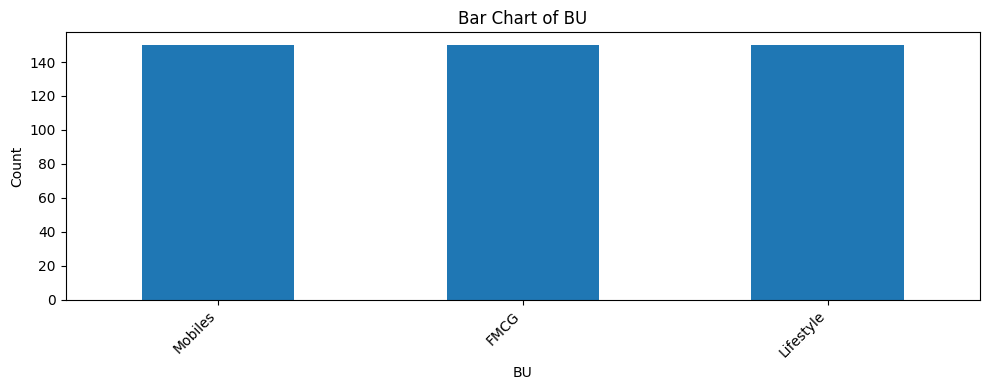

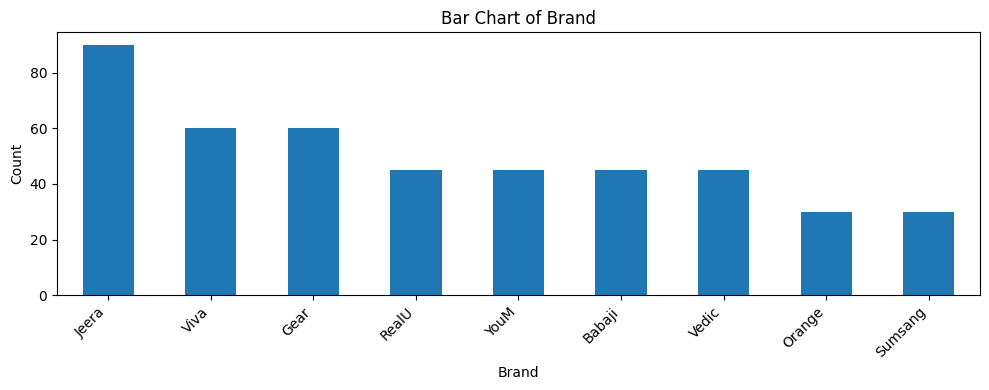

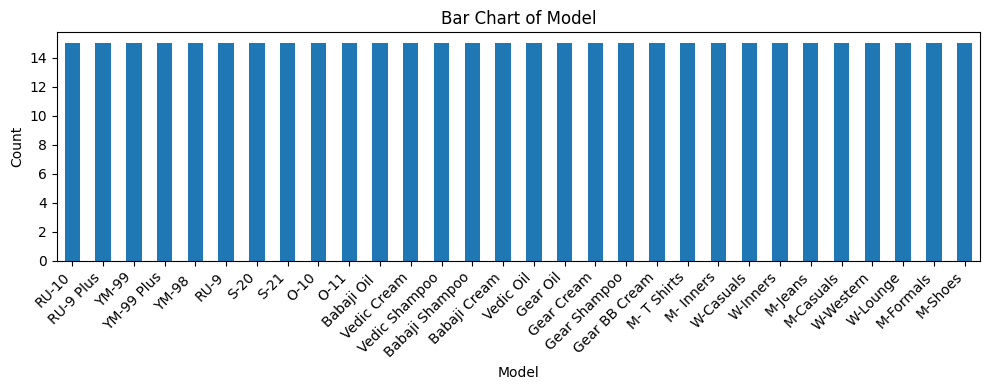

In [19]:
for col in cat_cols:
    plt.figure(figsize=(10,4))
    vc = df[col].value_counts()
    vc.plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"bar_{col}.png", dpi=150)
    plt.show()


Equal appearences can be seen in all data, days (except thursday), SKU's and models.
The data represents data in one city and 150 business units of mobiles, FMCG, Lifestyle each.
Jeera is the top brand in sales compared to others.